In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

# EJEMPLO DE REGRESIÓN LINEAL MÚLTIPLE

https://www.kaggle.com/datasets/guillemservera/precious-metals-data

This dataset offers detailed, up-to-date information on precious metals futures. Futures are financial contracts obligating the buyer to purchase, and the seller to sell, a particular precious metal (such as gold, silver, platinum, etc.) at a predetermined future date and price.

Use Cases:

* Trend Analysis: Examine patterns and price movements to predict future
market behaviors.
* Academic Research: Study the historical behavior and impact of global events on metal prices.
* Trading Strategies: Design and validate trading techniques based on precious metals futures.
* Risk Management: Use the data for hedging decisions and risk management for businesses involved in mining or trading precious metals.

Column Descriptions:

    * Date: The date the data was recorded. Format YYYY-MM-DD.
    * Open: Market opening price.
    * High: Highest price during the trading day.
    * Low: Lowest price during the trading day.
    * Close: Market closing price.
    * Volume: Number of contracts traded during the day.
    * Ticker: Market quotation symbol for the future.
    * Commodity: Name of the precious metal the future refers to.



In [3]:
df = pd.read_csv("all_commodities_data.csv")
print("Dimensiones del dataset :", df.shape)
df.head()

Dimensiones del dataset : (28991, 8)


,ticker,commodity,date,open,high,low,close,volume
0,GC=F,Gold,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,GC=F,Gold,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,GC=F,Gold,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,GC=F,Gold,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,GC=F,Gold,2000-09-06,274.200012,274.200012,274.200012,274.200012,0


In [4]:
# Preprocesando el dataset, vamos a cambiar los nombres para entender mejor las longitudes medidas de los peces
# df1 = df.rename(columns={'Length1':'VerticalLen','Length2':'DiagonalLen','Length3':'CrossLen'})
# df1.sample(5) # Display random 5 records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28991 entries, 0 to 28990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     28991 non-null  object 
 1   commodity  28991 non-null  object 
 2   date       28991 non-null  object 
 3   open       28991 non-null  float64
 4   high       28991 non-null  float64
 5   low        28991 non-null  float64
 6   close      28991 non-null  float64
 7   volume     28991 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
# Date to numeric value
df['date'] = pd.to_datetime(df['date'])

# Convert the datetime to a numeric format (e.g., Unix timestamp)
df['date_numeric'] = df['date'].map(pd.Timestamp.timestamp)

Text(0.5, 1.0, 'Correlation Matrix')

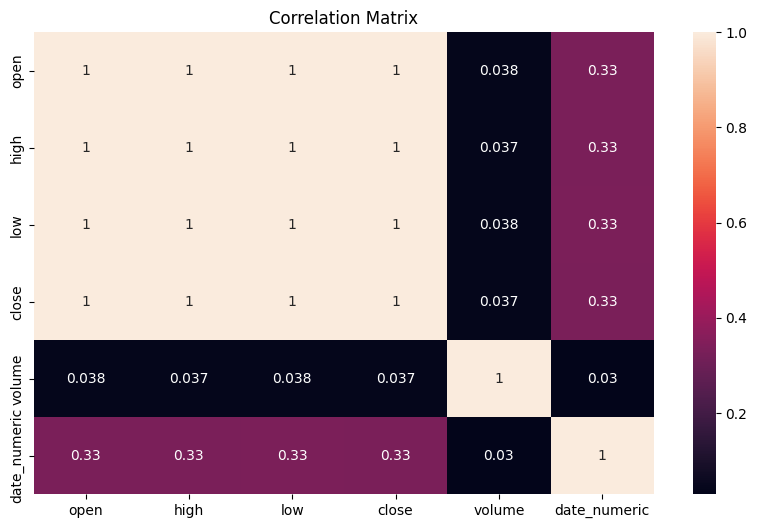

In [ ]:
df1 = df.drop(["ticker", "date", "commodity"], axis=1)
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

Al ver la matriz de correlación vemos que la fecha tiene muy poca coorelación con el volumen de capitación del commodity (valor de 0.03), estas variable son linealmente independientes.

Por otro lado, la variables de low price, high price, open y close son fuertemente dependientes por lo que se aconseja remover algunas de ellas.


In [ ]:
df3 = df.drop(["low", "close", "open"], axis=1)
df3.head()

,ticker,commodity,date,high,volume,date_numeric
0,GC=F,Gold,2000-08-30,273.899994,0,967593600.0
1,GC=F,Gold,2000-08-31,278.299988,0,967680000.0
2,GC=F,Gold,2000-09-01,277.000000,0,967766400.0
3,GC=F,Gold,2000-09-05,275.799988,2,968112000.0
4,GC=F,Gold,2000-09-06,274.200012,0,968198400.0


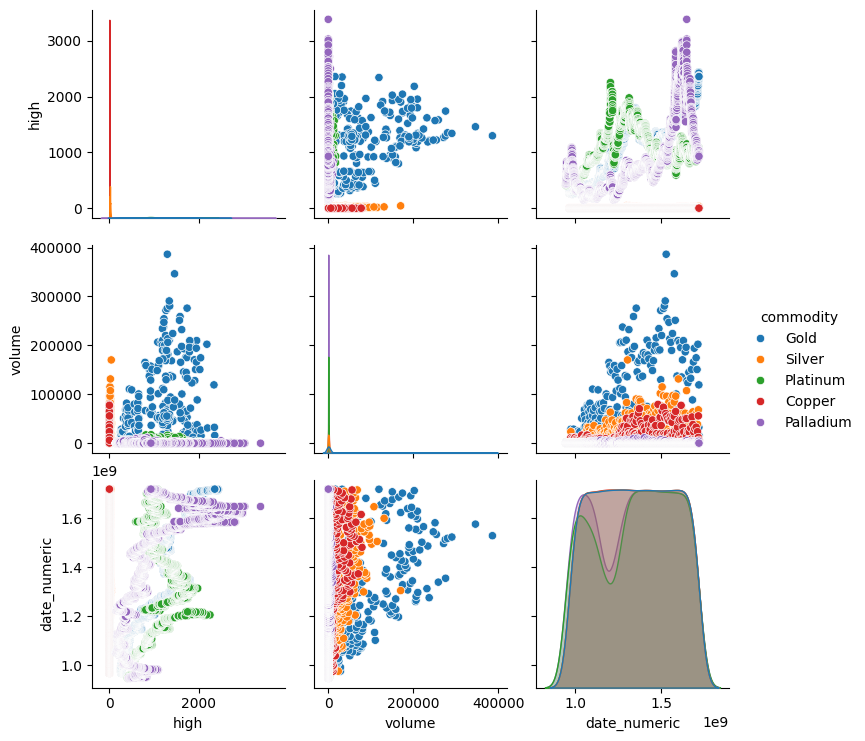

In [ ]:
# visualizando los datos
sns.pairplot(df3, kind= "scatter", hue="commodity")
# TODO: Analisis?

In [ ]:
# Preprocesando el conjunto de datos
df3.isna().sum() # revisando si hay nulos

ticker          0
commodity       0
date            0
high            0
volume          0
date_numeric    0
dtype: int64

In [ ]:
# Eliminando casos imposibles con la lógica del dataset.
df3[df3["volume"] == 0]

,ticker,commodity,date,high,volume,date_numeric
0,GC=F,Gold,2000-08-30,273.899994,0,9.675936e+08
1,GC=F,Gold,2000-08-31,278.299988,0,9.676800e+08
2,GC=F,Gold,2000-09-01,277.000000,0,9.677664e+08
4,GC=F,Gold,2000-09-06,274.200012,0,9.681984e+08
6,GC=F,Gold,2000-09-08,273.299988,0,9.683712e+08
...,...,...,...,...,...,...
28982,PA=F,Palladium,2024-05-22,1002.900024,0,1.716336e+09
28983,PA=F,Palladium,2024-05-23,973.299988,0,1.716422e+09
28984,PA=F,Palladium,2024-05-24,969.099976,0,1.716509e+09
28985,PA=F,Palladium,2024-05-28,976.700012,0,1.716854e+09


In [ ]:
# Eliminamos todos los datos identificados
df_filtered = df3[df3['volume'] != 0]
print(df_filtered.shape)
df_filtered


(24246, 6)


,ticker,commodity,date,high,volume,date_numeric
3,GC=F,Gold,2000-09-05,275.799988,2,9.681120e+08
5,GC=F,Gold,2000-09-07,274.000000,125,9.682848e+08
19,GC=F,Gold,2000-09-27,278.399994,3511,9.700128e+08
20,GC=F,Gold,2000-09-28,277.500000,631,9.700992e+08
21,GC=F,Gold,2000-09-29,274.600006,22,9.701856e+08
...,...,...,...,...,...,...
28965,PA=F,Palladium,2024-04-29,976.700012,2,1.714349e+09
28986,PA=F,Palladium,2024-05-29,963.099976,4087,1.716941e+09
28987,PA=F,Palladium,2024-05-30,957.500000,394,1.717027e+09
28988,PA=F,Palladium,2024-05-31,950.000000,19,1.717114e+09


In [ ]:
# ya que los commodity son un valor categórico, y necesitamos números para entrenar modelos, la mejor alternativa es realizar un "one-hot" encoding, que convierte los nombres de commodities (5 tipos 'Copper', 'Gold', 'Palladium', 'Platinum', 'Silver')
# en un arreglo de 1x5 donde solo se verá un uno (True) en la columna que corresponda al nombre, en el otro caso se tendrán ceros (False).
commodities_codificadas = pd.get_dummies(df3.commodity)
commodities_codificadas.head()

,Copper,Gold,Palladium,Platinum,Silver
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [ ]:
# luego creamos un dataframe que contenga toda la información
df4 = pd.concat([df_filtered, commodities_codificadas], axis="columns")
df4.head()
# Eliminamos columnas que no nos sirven para la regresión dada la naturaleza de sus datos
df5 = df4.drop(["commodity", "ticker", "date"], axis="columns")
df5.head()

,high,volume,date_numeric,Copper,Gold,Palladium,Platinum,Silver
3,275.799988,2.0,968112000.0,False,True,False,False,False
5,274.000000,125.0,968284800.0,False,True,False,False,False
19,278.399994,3511.0,970012800.0,False,True,False,False,False
20,277.500000,631.0,970099200.0,False,True,False,False,False
21,274.600006,22.0,970185600.0,False,True,False,False,False


# Creando un modelo de regresión

Para entrenar el modelo, se requieren datos de entrenamiento y datos de validación. También es necesario separar el dataframe en dos variables que sirvan como datos (𝑋) y etiquetas (𝑦)

In [ ]:
# X tendrá los datos de entrenamiento
X = df5[["date_numeric", "volume", "Copper", "Gold", "Palladium", "Platinum", "Silver"]]
y = df5[["high"]]
# particionando
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# validando los resultados
print("Tamaño de X_train=", X_train.shape)
print("Tamaño de X_test=", X_test.shape)
print("Tamaño de y_train=", y_train.shape)
print("Tamaño de y_test=", y_test.shape)

Tamaño de X_train= (23192, 7)
Tamaño de X_test= (5799, 7)
Tamaño de y_train= (23192, 1)
Tamaño de y_test= (5799, 1)


# REGRESIÓN POLINÓMICA

Como se tienen diferentes commodities, la relacion entre características como open o volume no es lineal. Por lo tanto, una recta no va a modelar apropiadamente el comportamiento del open price de los commodities en función de sus características. Crearemos una función para visualizar datos usando un polinomio con varios grados.

Las funciones que permiten trazar varios grados de un polinomio en función de los datos son np.polyfit() que funciona mediante mínimos cuadrados para resovler una ecuación polinómica. Esta función requiere suministrar datos (x,y) y el grado del polinomio a ajustar. Polyfit retornará los coeficientes que mejor se ajusten a los datos.

In [ ]:
def polynomial_plot(feature, label):
    # Crear un array de una dimensión para reducir el arreglo de dos dimensiones a una.
    # x_coordinates = feature
    x_coordinates = feature.dropna().replace([np.inf, -np.inf], np.nan).dropna()
    y_coordinates = np.squeeze(label.loc[x_coordinates.index])

    # polinomio de primer grado (recta)
    linear_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 1))
    # polinomio de segundo grado (curva parabólica)
    quadratic_func = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 6))

    # Generar valores para visualizar los datos
    values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))

    plt.scatter(x_coordinates,y_coordinates, color='blue')
    plt.plot(values, linear_func(values), color='cyan', linestyle='dashed', label='Modelo lineal')
    plt.plot(values, quadratic_func(values), color='red', label='Polinomio cuadrático')
    plt.xlabel('Datos de test de %s '%(feature.name))
    plt.ylabel('High price')
    plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
    plt.legend()
    plt.title("Comparacion de funciones lineales y cuadráticas para la característica %s" % (feature.name))
    plt.show()

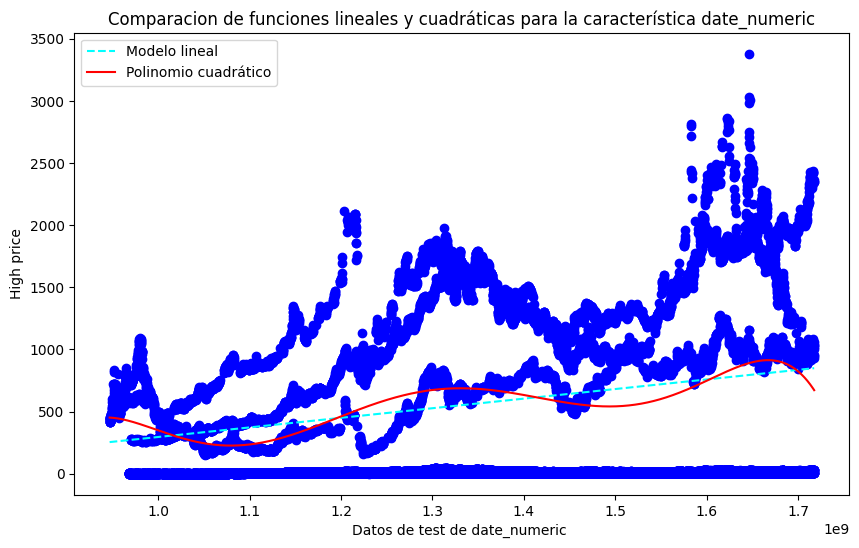

In [ ]:
polynomial_plot(X_train.date_numeric, y_train) # comparando modelos para open price y fechas

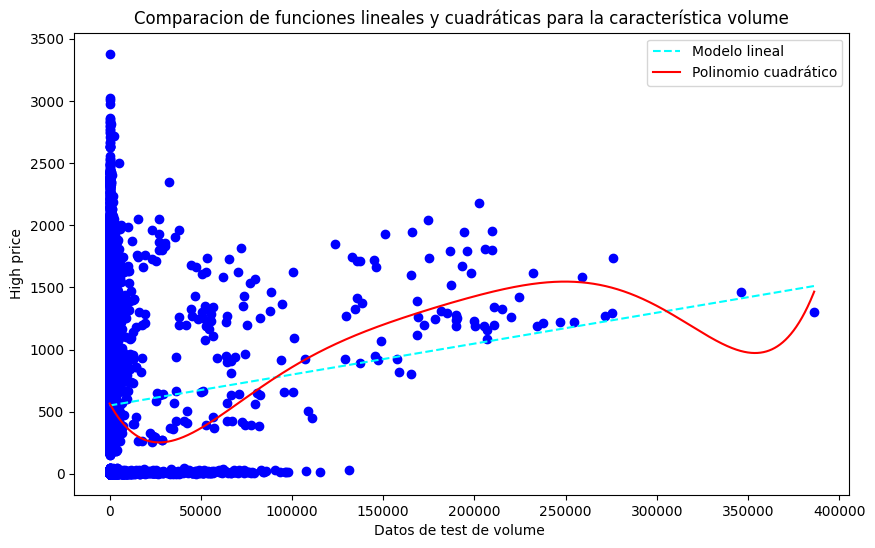

In [ ]:
polynomial_plot(X_train.volume, y_train) # comparando los modelos para el volumen y dates

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
# Handle missing values in X_train (replace with mean for example)
X_train_filled = X_train.fillna(X_train.mean())

poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X_train_filled)  # Use the filled DataFrame
poly.fit(X_poly, y_train)

lm = LinearRegression()
# Handle missing values in y_train (replace with mean for example)
y_train_filled = y_train.fillna(y_train.mean())
lm.fit(X_poly, y_train_filled) # Use the filled DataFrame

# You might also need to handle missing values in X_test
X_test_filled = X_test.fillna(X_test.mean())

predictions = lm.predict(poly.fit_transform(X_test_filled))

# Handle missing values in y_test (replace with mean for example)
y_test_filled = y_test.fillna(y_test.mean()) # Fill missing values in y_test

print('r2_score= ', metrics.r2_score(y_test_filled, predictions)) # Use y_test_filled

r2_score=  0.7288094086410728


In [ ]:
def get_mean_squared_error(y_real, y_pred):
  mse = (y_real - y_pred)**2
  mse = sum(mse) / len(y_real)
  return mse

def get_mean_absolute_error(y_real, y_pred):
  mae = abs(y_pred - y_real)
  mae = sum(mae) / len(y_real)
  return mae

def get_r_square(y_real, y_pred):
  mean = np.mean(y_real)
  pred = (y_pred - mean)**2
  pred = sum(pred)
  real = (y_test - mean)**2
  real = sum(real)
  r_2 = pred / real
  return r_2

def get_r(y_real, y_pred):
  mean = np.mean(y_real)
  pred = sum((y_pred - mean)**2)
  real = sum((y_test - mean)**2)
  r_2 = pred / real
  return r_2 ** 0.5

Text(0.5, 1.0, 'Comparación del high price generado por el modelo y las etiquetas')

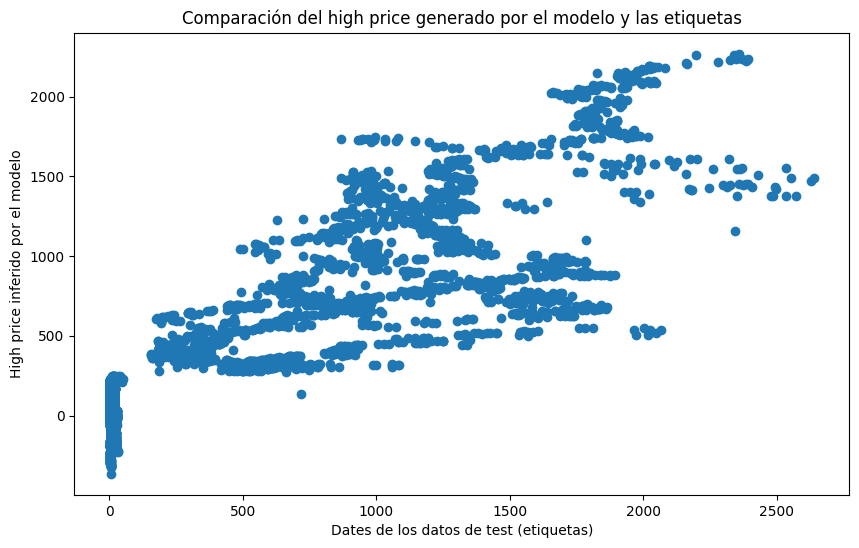

In [ ]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
plt.scatter(y_test, predictions)
plt.xlabel('Dates de los datos de test (etiquetas)')
plt.ylabel('High price inferido por el modelo')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Comparación del high price generado por el modelo y las etiquetas")

Text(0.5, 1.0, 'histograma de las diferencias')

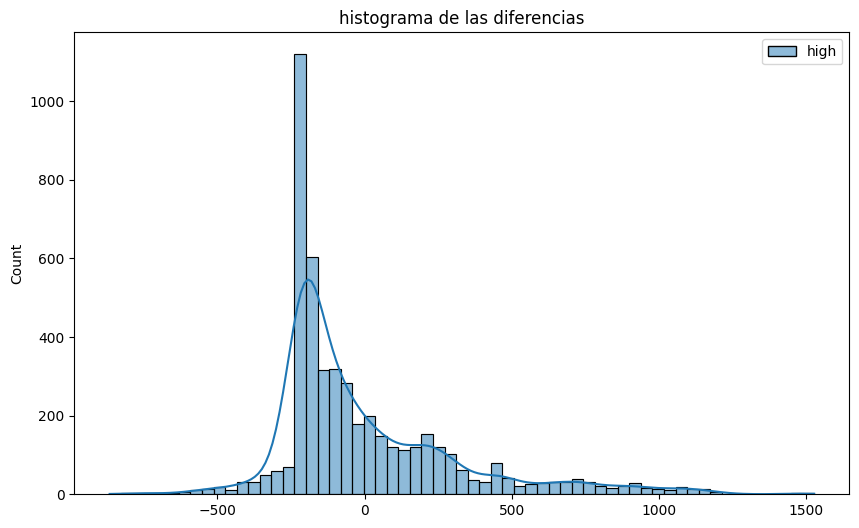

In [ ]:
# Evaluando el modelo con un histograma que grafique la diferencia entre y_test y las predicciones del modelo
sns.histplot(y_test-predictions, kde=True)
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("histograma de las diferencias")

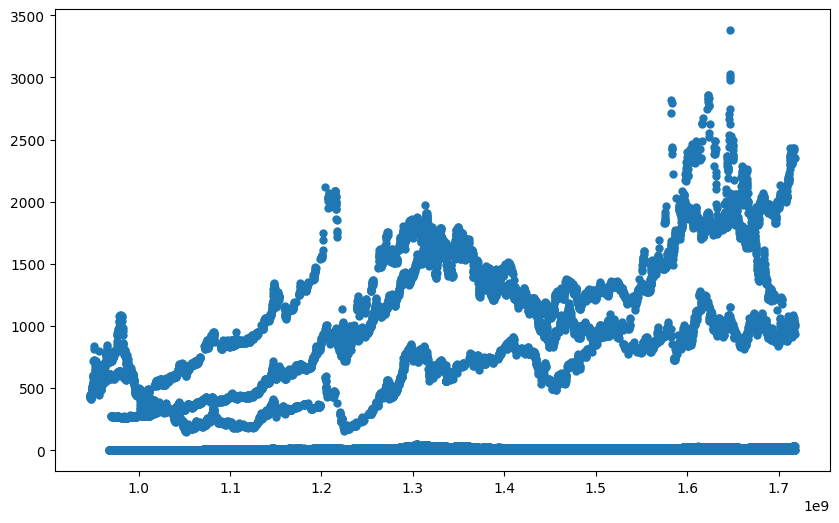

In [ ]:
# creating an object for the polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer # Import SimpleImputer

poly_regressor = PolynomialFeatures(degree=1)

# Handle missing values in X_train before applying PolynomialFeatures
imputer = SimpleImputer(strategy='mean') # Create an imputer to fill missing values
X_train_imputed = imputer.fit_transform(X_train) # Fit and transform X_train

poly_features = poly_regressor.fit_transform(X_train_imputed) # Use the imputed DataFrame

# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()

# Handle missing values in y_train *before* fitting the model
imputer_y = SimpleImputer(strategy='mean') # Create a new imputer for y_train
y_train_imputed = imputer_y.fit_transform(y_train) # Fit and transform y_train

model.fit(poly_features, y_train_imputed) # Use the imputed y_train

y_pred = model.predict(poly_features)

# Extract the single column from y_train_imputed for plotting
y_train_imputed_1d = y_train_imputed.ravel()  # Convert to a 1D array

plt.scatter(X_train_imputed[:, 0], y_train_imputed_1d) # Plot against